# Sensitivity

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('../src')
from emagpy import Problem
import numpy as np
import matplotlib.pyplot as plt

2/30 data removed (filterRange).


Text(0, 0.5, 'Depth [m]')

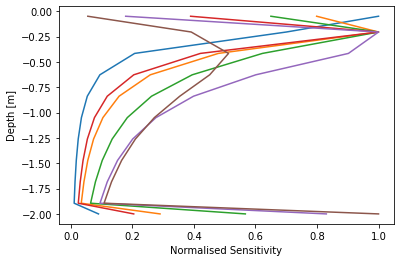

In [4]:
k = Problem()
k.createSurvey('../src/examples/cover-crop/coverCropTransect.csv')
k.filterRange(vmax=50)
k.setInit(depths0=np.linspace(0.1, 2, 10))
k.depths = k.depths0.copy() # need to specify initial model to compute sensitivity
k.models = k.conds0.copy()
sens = k.computeSens()

depth = k.depths[0][0,:]
mdepths = np.r_[depth[0]/2, depth[:-1] + np.diff(depth)/2, depth[-1]]
fig, ax = plt.subplots()
ax.plot(sens[0][:,:,0], -mdepths)
ax.set_xlabel('Normalised Sensitivity')
ax.set_ylabel('Depth [m]')

Survey 1/1
28/28 inverted


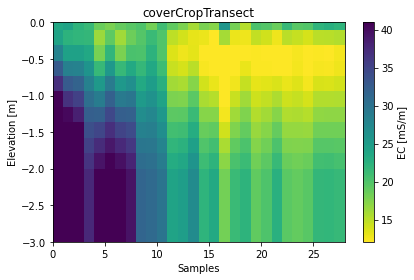

In [12]:
k.invert(forwardModel='FSlin', method='Gauss-Newton', alpha=0.07, regularization='l2')
k.showResults()

Survey 1/1
28/28 inverted
[0.94392045 1.47914455 1.52668667 2.05300504 1.92802552 2.02204484
 1.99260715 1.46048602 2.20771289 3.58411838]
Survey 1/1
28/28 inverted
[1.0371098  1.68689508 1.63151174 2.0768699  2.17766818 2.06566235
 2.26572151 1.60130176 2.25794889 3.623228  ]


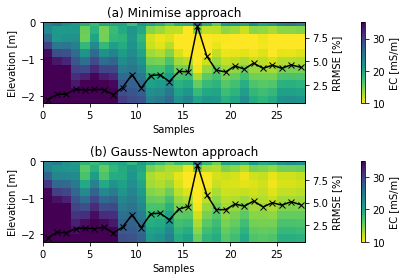

In [22]:
fig, axs = plt.subplots(2, 1)
ax = axs[0]
k.invert(forwardModel='CS', method='L-BFGS-B', alpha=0.07, regularization='l2')
k.showResults(index=0, ax=ax, vmin=10, vmax=35, maxDepth=2.2, rmse=True)
ax.set_title('(a) Minimise approach')

ax = axs[1]
k.invert(forwardModel='CS', method='Gauss-Newton', alpha=0.07, regularization='l2')
k.showResults(index=0, ax=ax, vmin=10, vmax=35, maxDepth=2.2, rmse=True)
ax.set_title('(b) Gauss-Newton approach')

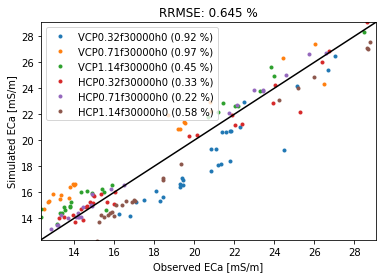

In [23]:
k.showOne2one()

Forward modelling


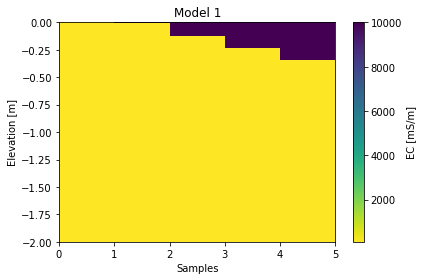

In [63]:
depth = np.linspace(0.01, 1, 10) # depth of bottom of each layer
nlayer = len(depth) + 1 # number of layer (last layer is infinite)
nprofile = 5
depths = np.ones((nprofile, len(depth))) * depth[None,:]
cond = np.ones(len(depth)+1) * 100 # base profile in mS/m
model = np.ones((nprofile, nlayer)) * cond[None,:] # model (one 1D profile per row)
for i in range(nprofile):
    model[i,:i] = model[i,:i] * 100


k = Problem()
coils = ['VCP0.32f30000', 'VCP0.71f30000', 'VCP1.18f30000',
         'HCP0.32f30000', 'HCP0.71f30000', 'HCP1.18f30000']
k.setModels([depths],[model])
sens = k.computeSens(forwardModel='FSlin', coils=coils)
# print(sens[0])

fig, ax = plt.subplots()
k.showResults(ax=ax, maxDepth=2)

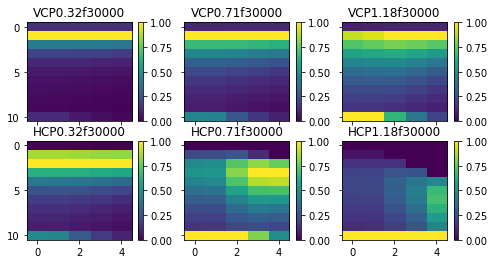

In [64]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(8, 4))
axs = axs.flatten()
for i, coil in enumerate(coils):
    ax = axs[i]
    ax.set_title(coil)
    cax = ax.imshow(sens[0][:,i,:], vmin=0, vmax=1)
    ax.set_aspect('auto')
    fig.colorbar(cax, ax=ax)